# Shift-invariance in the [L] subband

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline
import pywt
from io_stuff import *
from color import *

### Create the three images
With a circle of diameter 10 that moves from coordinate (30, 20), (30, 21), and (30, 22). (row, column)

In [2]:
%%bash
jupyter nbconvert --to notebook --execute create_moving_circles.ipynb

[NbConvertApp] Converting notebook create_moving_circles.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 86642 bytes to create_moving_circles.nbconvert.ipynb


### Load the images

In [3]:
prefix = "moving_circle_"
frame_0 = load_img(prefix + "000")
frame_1 = load_img(prefix + "001")
frame_2 = load_img(prefix + "002")

### Work only with luma

In [4]:
frame_0_Y = RGB_to_YCoCg(frame_0)[:,:,0]
frame_1_Y = RGB_to_YCoCg(frame_1)[:,:,0]
frame_2_Y = RGB_to_YCoCg(frame_2)[:,:,0]

### 2D-DWT of the frames

In [5]:
f0_haar_LL, (f0_haar_LH, f0_haar_HL, f0_haar_HH) = pywt.dwt2(frame_0_Y, 'haar')
f1_haar_LL, (f1_haar_LH, f1_haar_HL, f1_haar_HH) = pywt.dwt2(frame_1_Y, 'haar')
f2_haar_LL, (f2_haar_LH, f2_haar_HL, f2_haar_HH) = pywt.dwt2(frame_2_Y, 'haar')

### Interpolation of the L subbands: the [L] subbands

In [6]:
f0_haar_iL = pywt.idwt2([f0_haar_LL, (None, None, None)], 'haar')
f1_haar_iL = pywt.idwt2([f1_haar_LL, (None, None, None)], 'haar')
f2_haar_iL = pywt.idwt2([f2_haar_LL, (None, None, None)], 'haar')

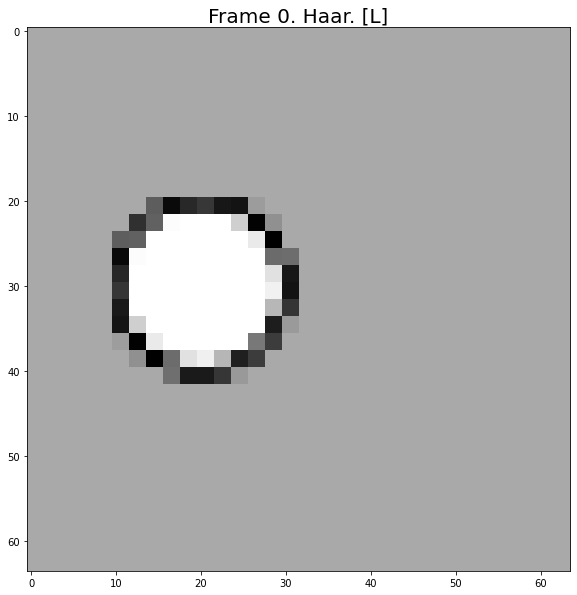

In [7]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Haar. [L]", fontsize=20)
plt.imshow(f0_haar_iL, cmap='gray')
plt.savefig('f0_haar_iL.png')
plt.show()

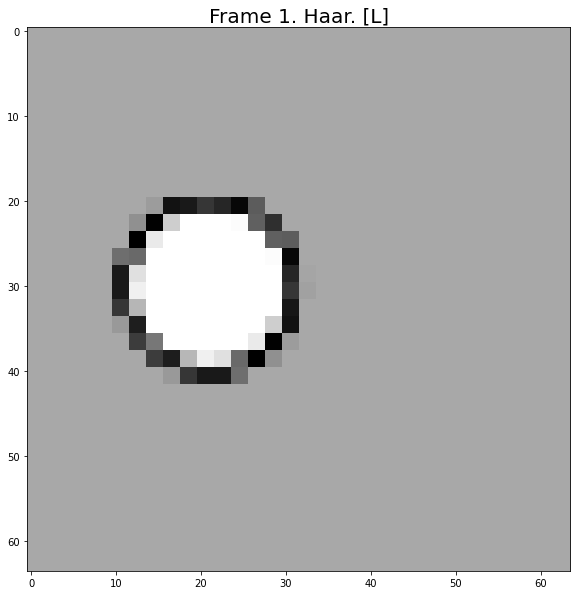

In [8]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Haar. [L]", fontsize=20)
plt.imshow(f1_haar_iL, cmap='gray')
plt.savefig('f1_haar_iL.png')
plt.show()

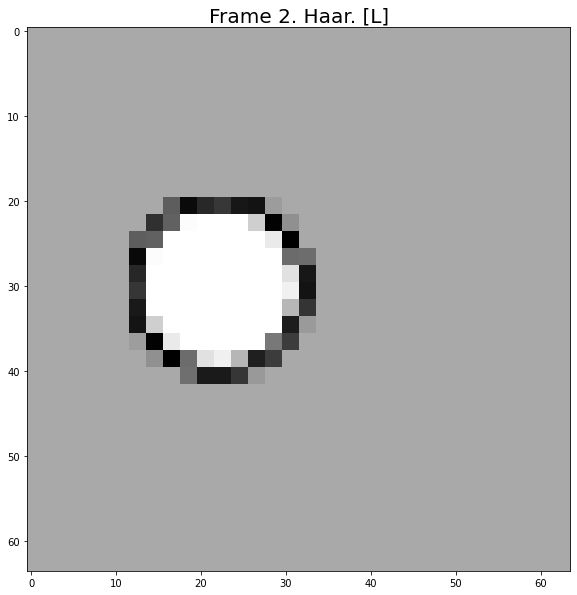

In [9]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Haar. [L]", fontsize=20)
plt.imshow(f2_haar_iL, cmap='gray')
plt.savefig('f2_haar_iL.png')
plt.show()

Notice that the subbands [L] of the frames 0 and 2 have the same coefficients, but this is not true for the frame 1.

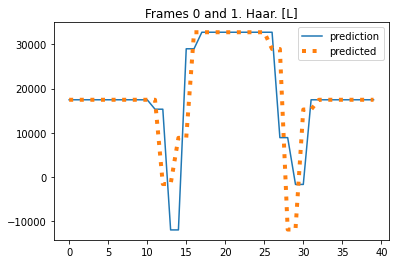

In [10]:
plt.title("Frames 0 and 1. Haar. [L]")
plt.plot(np.roll(f0_haar_iL[36, 0:40], 1), label="prediction")
plt.plot(f1_haar_iL[36, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_1_haar_iL.svg")
plt.show()

The predicted subband and the prediction subband does not need to be identical to estimate a motion field. For example, a block-based motion estimator should determine here the right displacement between the predicted structure and the reference one.

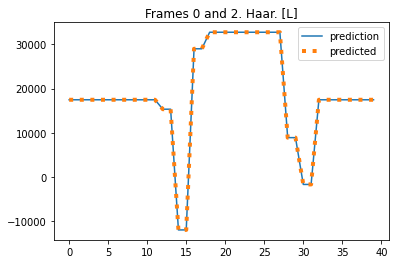

In [11]:
plt.title("Frames 0 and 2. Haar. [L]")
plt.plot(np.roll(f0_haar_iL[36, 0:40], 2), label="prediction")
plt.plot(f2_haar_iL[36, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_2_haar_iL.svg")
plt.show()

### Ignore the rest

NameError: name 'iL_0_haar' is not defined

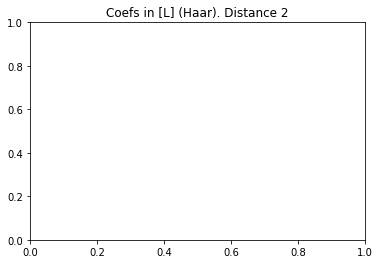

In [12]:
plt.title("Coefs in [L] (Haar). Distance 2")
#plt.plot(iL_0_haar[35, 0:40], label="reference")
plt.plot(np.roll(iL_0_haar[35, 0:40], 2), label="predicted")
plt.plot(iL_1_haar[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.legend()
plt.savefig("haar_iL_1.svg")
plt.savefig("haar_iL_1.pdf")
plt.show()

### Interpolation of the H subbands: the [H] subbands

In [ ]:
iH_0_haar = pywt.idwt2([None,(LH_0_haar, HL_0_haar, HH_0_haar)], 'haar')
iH_1_haar = pywt.idwt2([None,(LH_1_haar, HL_1_haar, HH_1_haar)], 'haar')
iH_2_haar = pywt.idwt2([None,(LH_2_haar, HL_2_haar, HH_2_haar)], 'haar')

In [ ]:
plt.figure(figsize=(10,10))
plt.title("[H]_0_haar", fontsize=20)
plt.imshow(iH_0_haar, cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.title("[H]_1_haar", fontsize=20)
plt.imshow(iH_1_haar, cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.title("[H]_2_haar", fontsize=20)
plt.imshow(iH_2_haar, cmap='gray')
plt.show()

In [ ]:
plt.title("Coefs in [H] (Haar). Distance 1")
plt.plot(np.roll(iH_0_haar[35, 0:40], 1), label="predicted")
plt.plot(iH_1_haar[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.legend()
plt.savefig("haar_iH_0.svg")
plt.savefig("haar_iH_0.pdf")
plt.show()

In [ ]:
plt.title("Coefs in [H] (Haar). Distance 2")
plt.plot(np.roll(iH_0_haar[35, 0:40], 2), label="predicted")
plt.plot(iH_2_haar[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.legend()
plt.savefig("haar_iH_0.svg")
plt.savefig("haar_iH_0.pdf")
plt.show()

In [ ]:
LL_0_db5, (LH_0_db5, HL_0_db5, HH_0_db5) = pywt.dwt2(frame_0_Y, 'db5')
iL_0_db5 = pywt.idwt2([LL_0_db5, (None, None, None)], 'db5')
LL_1_db5, (LH_1_db5, HL_1_db5, HH_1_db5) = pywt.dwt2(frame_1_Y, 'db5')
iL_1_db5 = pywt.idwt2([LL_1_db5, (None, None, None)], 'db5')

In [ ]:
plt.figure(figsize=(10,10))
plt.title("iL_0_db5", fontsize=20)
plt.imshow(iL_0_db5, cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.title("iL_1_db5", fontsize=20)
plt.imshow(iL_1_db5, cmap='gray')
plt.show()

In [ ]:
plt.title("Coefs in [L] (Daubechies 5)")
plt.plot(np.roll(iL_0_db5[35, 0:40],1), label="predicted")
plt.plot(iL_1_db5[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.legend()
plt.savefig("db5_iL.svg")
plt.savefig("db5_iL.pdf")
plt.show()

In [ ]:
LL_0_bior35, (LH_0_bior35, HL_0_bior35, HH_0_bior35) = pywt.dwt2(frame_0_Y, 'bior3.5')
iL_0_bior35 = pywt.idwt2([LL_0_bior35, (None, None, None)], 'bior3.5')
LL_1_bior35, (LH_1_bior35, HL_1_bior35, HH_1_bior35) = pywt.dwt2(frame_1_Y, 'bior3.5')
iL_1_bior35 = pywt.idwt2([LL_1_bior35, (None, None, None)], 'bior3.5')

In [ ]:
plt.figure(figsize=(10,10))
plt.title("iL_0_bior35", fontsize=20)
plt.imshow(iL_0_bior35, cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.title("iL_1_bior35", fontsize=20)
plt.imshow(iL_1_bior35, cmap='gray')
plt.show()

In [ ]:
plt.title("Coefs in [L] (Biorthogonal 3.5)")
plt.plot(np.roll(iL_0_bior35[35, 0:40], 1), label="predicted")
plt.plot(iL_1_bior35[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.legend()
plt.savefig("bior35_iL.svg")
plt.savefig("bior35_iL.pdf")
plt.show()

In [ ]:
iH_0_db5 = pywt.idwt2([None,(LH_0_db5, HL_0_db5, HH_0_db5)], 'db5')
iH_1_db5 = pywt.idwt2([None,(LH_1_db5, HL_1_db5, HH_1_db5)], 'db5')

In [ ]:
plt.figure(figsize=(10,10))
plt.title("iH_0_db5", fontsize=20)
plt.imshow(iH_0_db5, cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.title("iH_1_db5", fontsize=20)
plt.imshow(iH_1_db5, cmap='gray')
plt.show()

In [ ]:
plt.title("Coefs in [H] (db5)")
plt.plot(np.roll(iH_0_db5[35, 0:40], 1), label="predicted")
plt.plot(iH_1_db5[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.legend()
plt.savefig("db5_iH.svg")
plt.savefig("db5_iH.pdf")
plt.show()

In [ ]:
iH_0_bior35 = pywt.idwt2([None,(LH_0_bior35, HL_0_bior35, HH_0_bior35)], 'bior3.5')
iH_1_bior35 = pywt.idwt2([None,(LH_1_bior35, HL_1_bior35, HH_1_bior35)], 'bior3.5')

In [ ]:
plt.figure(figsize=(10,10))
plt.title("iH_0_bior35", fontsize=20)
plt.imshow(iH_0_bior35, cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.title("iH_1_bior35", fontsize=20)
plt.imshow(iH_1_bior35, cmap='gray')
plt.show()

In [ ]:
plt.title("Coefs in [H] (bior35)")
plt.plot(np.roll(iH_0_bior35[35, 0:40], 1), label="predicted")
plt.plot(iH_1_bior35[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.plot(np.roll(iH_1_bior35[35, 0:40][::-1], 3), linestyle=':', linewidth=3, label="prediction b")
plt.legend()
plt.savefig("bior35_iH.svg")
plt.savefig("bior35_iH.pdf")
plt.show()

In [ ]:
iiH_0_bior35 = pywt.idwt2([iH_0_bior35, (None, None, None)], 'bior3.5')
iiH_1_bior35 = pywt.idwt2([iH_1_bior35, (None, None, None)], 'bior3.5')

In [ ]:
plt.title("Coefs in [H] (bior35)")
plt.plot(np.roll(iiH_0_bior35[70, 0:80], 3), label="predicted")
plt.plot(iiH_1_bior35[70, 0:80], linestyle=':', linewidth=4, label="prediction")
plt.legend()
plt.savefig("bior35_iiH.svg")
plt.savefig("bior35_iiH.pdf")
plt.show()

In [ ]:
%%bash

# Create the two images ("/tmp/moving_circle_000.png" and "/tmp/moving_circle_001.png") with a circle
# of diameter 10 that moves from coordinate (20,30) to (21,30).
/home/vruiz/MRVC/tools/moving_circle.sh -w 128 -h 128 -x 20 -y 30 -d 10 -f 3
mv /tmp/moving_circle_000.png .
mv /tmp/moving_circle_002.png .

In [ ]:
frame_2 = load_frame(prefix + "002")
frame_2_Y = RGB_to_YCoCg(frame_2)[:,:,0]

In [ ]:
LL_2_bior35, (LH_2_bior35, HL_2_bior35, HH_2_bior35) = pywt.dwt2(frame_2_Y, 'bior3.5')
iL_2_bior35 = pywt.idwt2([LL_2_bior35, (None, None, None)], 'bior3.5')
iH_2_bior35 = pywt.idwt2([None,(LH_2_bior35, HL_2_bior35, HH_2_bior35)], 'bior3.5')

In [ ]:
plt.title("Coefs in [L] (Biorthogonal 3.5)")
plt.plot(np.roll(iL_0_bior35[35, 0:40], 2), label="predicted")
plt.plot(iL_2_bior35[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.legend()
#plt.savefig("bior35_iL.svg")
#plt.savefig("bior35_iL.pdf")
plt.show()

In [ ]:
plt.title("Coefs in [H] (bior35)")
plt.plot(np.roll(iH_0_bior35[35, 0:40], 2), label="predicted")
plt.plot(iH_2_bior35[35, 0:40], linestyle=':', linewidth=4, label="prediction")
plt.legend()
plt.savefig("bior35_iH.svg")
plt.savefig("bior35_iH.pdf")
plt.show()